In [347]:
from align import *
import os

### How to get target images
1. Read an original image `original.png` from file system (screen captured).
2. Re-capture the output image `target.png` w/ mobile camera.
3. Save the image as `source.png` in the same directory.

### How to crop source images & evaluate image similarity
1. Read the screen captured image, `target.png` and the mobile re-capture image, `source.png`.
2. Crop image and save them as `*_cropped.png` w/ homography.
3. Evaluate image similarity w. metrics like MSE, PSNR, SSIM.

In [348]:
dirName = "../../data/mopnet"
imFilename = os.path.join(dirName, "source.png")
refFilename = os.path.join(dirName, "source.png")

print("Reading reference image : ", refFilename)
imReference = cv2.imread(refFilename, cv2.IMREAD_COLOR)

print("Reading image to align : ", imFilename); 
im = cv2.imread(imFilename, cv2.IMREAD_COLOR)

Reading reference image :  ../../data/mopnet/source.png
Reading image to align :  ../../data/mopnet/source.png


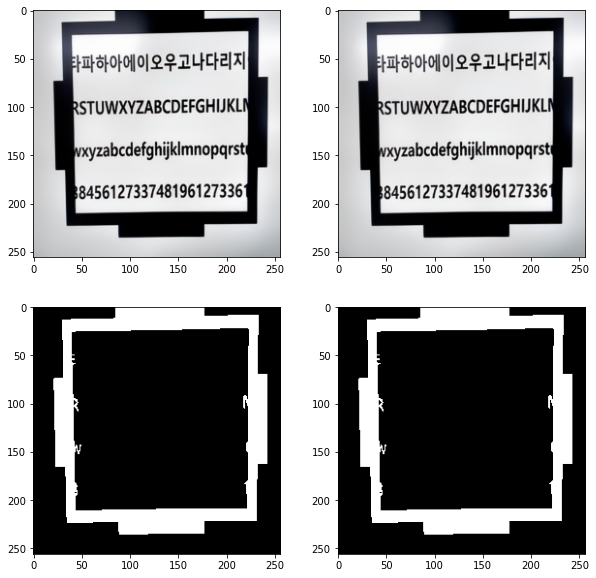

In [349]:
_, ax = plt.subplots(ncols=2, nrows=2, figsize=(10,10))
ax[0,0].imshow(im)
ax[0,1].imshow(imReference)
ax[1,0].imshow(Frame(im, 100), 'gray')
ax[1,1].imshow(Frame(imReference), 'gray')
plt.show()

[[ 39  27]
 [221  22]
 [221 208]
 [ 44 211]]
[[ 39  27]
 [221  22]
 [221 208]
 [ 44 211]]


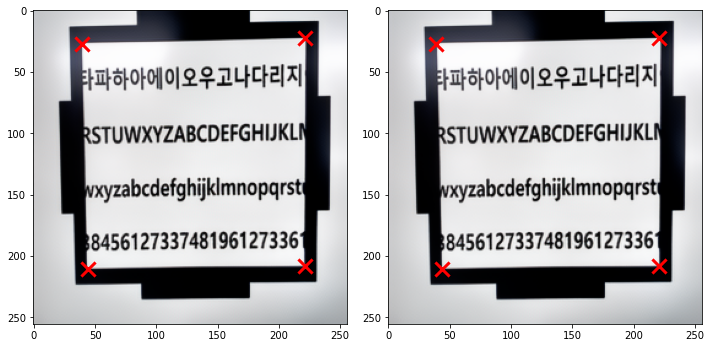

In [350]:
src, tar = CropImage(im, imReference, 100)

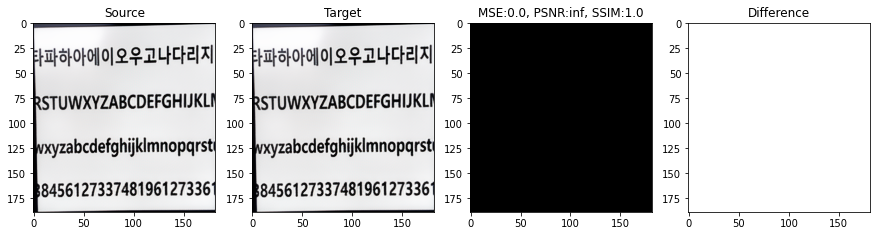

True

In [351]:
from skimage.metrics import mean_squared_error, peak_signal_noise_ratio, structural_similarity

mse = mean_squared_error(src, tar)
psnr = peak_signal_noise_ratio(src, tar)
ssim, diff = structural_similarity(src, tar, multichannel=True, full=True)

diff = (diff * 255).astype("uint8")
diff = cv2.cvtColor(diff, cv2.COLOR_RGB2GRAY)

fig, ax = plt.subplots(ncols=4, figsize=(15, 5))
ax[0].imshow(src)
ax[0].set_title('Source')
ax[1].imshow(tar)
ax[1].set_title('Target')
ax[2].imshow(np.abs(src-tar))
ax[2].set_title(f'MSE:{round(mse,2)}, PSNR:{round(psnr,2)}, SSIM:{round(ssim,2)}')
ax[3].imshow(diff, cmap='gray', vmin=0, vmax=255)
ax[3].set_title('Difference')
plt.show()

cv2.imwrite(os.path.join(dirName, "source_cropped.png"), src)
cv2.imwrite(os.path.join(dirName, "target_cropped.png"), tar)